In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
import sklearn
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
trainx=pd.read_csv("./HeartDisease.csv")

In [3]:
print(trainx.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num    Place  
0    0  Hungary  
1    0  Hungary  
2    0  Hungary  
3    0  Hungary  
4    0  Hungary  


In [4]:
trainx.describe()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


Pasamos la variable de lugar a nuerica. 0 para hungary, 1 para VA y 2 para otros

In [5]:
train = trainx.copy()
train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")] = 2
train["Place"][train["Place"] == "Hungary"] = 0
train["Place"][train["Place"] == "VA"] = 1
#
#pdf = train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")]

/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [6]:
print(train.isnull().sum().sum())

217


In [7]:
train.describe()


,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [8]:
print(train.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num Place  
0    0     0  
1    0     0  
2    0     0  
3    0     0  
4    0     0  


### Analizamos como rellenar los datos faltantes
- En el colesterol (chol) es interesante pensar en el promedio, 
    aunque se me ocurren muchas maneras, como poner el promedio de similares.
- En la presion arterial con la que ingresaron (trestbps) es interesante utilizar promedio
    aunque plantear el uso de similitudes se debe considerar.
- En el campo que indica si si tiene el azucar en la sangre > 120 mg/dl (fbs) se debe considerar que 1 es para true
    y 0 es para false, sin embargo no es un campo que podamos rellenar a la ligera
    por lo tanto se debe considerar si se elimina.
- Los resultados electrocardiográficos en reposo (restecg) son Value 0: normal, Value 1: con anormalidad de la onda ST-T (inversiones de la onda T y / o elevación o depresión del ST> 0.05 mV) y Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes. Por todo lo anterior rellenarlos no es factible con el promedio.
- La frecuencia cardíaca máxima alcanzada (thalach) es otro atributo que se puede relenar con promedios pero
    considerando que esto es un principal sintoma de afeciones cardiacas, por lo que recomiendo
    utilizar el promedio pero de los que poseen afecciones en caso de afectado, o promedio de los que no en caso
    de ser una persona que no se le encontro afeciones cardiacas.
- La depresión del ST inducida por el ejercicio relativo al descanso (oldpeak) tiene como valores Valor 1: pendiente ascendente - Valor 2: plano - Valor 3: pendiente descendente. este valor no es factible rellenarlo
- La angina inducida por ejercicio (1 = sí; 0 = no) (exang) es otro valor que conviene analizar la forma de rellenarlo, ya que aplicar un simple promedio no es valido.

    


## Rellenando los datos con ayuda medica
Para tener unos datos mas confiables la información restante se completa utilizando el criterios medicos encontrados en la web y con la ayuda del medico xxxx quien presto su asesoramiento en temas cardiacos. Por tal motivo los se definen los datos faltamtes de esta forma:

- En el colesterol (chol) se rellena con promedio, pero relacionando afeciones cardiacas con dicho promedio, es decir si el dato faltante corresponde a una persona con afeccion cardiaca se rellena con promedio de afecciones cardiacas.

In [9]:
cholPromDisease = train["chol"][train["num"] == 1].mean()
cholPromNotDisease = train["chol"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y colesterol
train["chol"][train["num"] == 0] = train["chol"].fillna(cholPromNotDisease)
train["chol"][train["num"] == 1] = train["chol"].fillna(cholPromDisease)
print(cholPromNotDisease)
print(cholPromDisease)

print(train.isnull().sum().sum())
#.mean ()

217.30701754385964
180.66502463054186
191


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- En la presion arterial con la que ingresaron (trestbps) se plantea el mismo tipo de promedio que en Colesterol

In [10]:
trestbpsPromDisease = train["trestbps"][train["num"] == 1].mean()
trestbpsPromNotDisease = train["trestbps"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["trestbps"][train["num"] == 0] = train["trestbps"].fillna(trestbpsPromNotDisease)
train["trestbps"][train["num"] == 1] = train["trestbps"].fillna(trestbpsPromDisease)
print(trestbpsPromNotDisease)
print(trestbpsPromDisease)

print(train.isnull().sum().sum())

130.3920704845815
132.751269035533
158


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- La frecuencia cardíaca máxima alcanzada (thalach) se rellena igual que el colesterol

In [11]:
thalachPromDisease = train["thalach"][train["num"] == 1].mean()
thalachPromNotDisease = train["thalach"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["thalach"][train["num"] == 0] = train["thalach"].fillna(trestbpsPromNotDisease)
train["thalach"][train["num"] == 1] = train["thalach"].fillna(trestbpsPromDisease)
print(thalachPromNotDisease)
print(thalachPromDisease)

print(train.isnull().sum().sum())

141.88105726872246
126.87817258883248
125


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- El valor de angina por ejercicio es muy interesante de analizar. Esta condicion se presenta normalmente en personas mayores de 30 (mujeres 35/40) con enfermedad arterial coronaria (EAC), es decir se presenta cuando aparece una condicion cardiaca y como el estrechamiento de la válvula aórtica del corazón (estenosis aórtica). que tambien se relaciona con taponamientos debido a altos niveles de colesterol. Dado lo anterior se propone rellenar este valor dependiendo de si presenta una afeccion cardiaca, si tiene un colestrol alto y si es mayor de 35.

In [12]:
train["exang"][(train["num"] == 1) & (train["Age"] > 35) & (train["chol"] > 160.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 1) & (train["Age"] < 30) & (train["chol"] < 130.0 ) ] = train["exang"].fillna(0)
train["exang"][(train["num"] == 0) & (train["Age"] > 35) & (train["chol"] > 190.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 0) & (train["Age"] < 30) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["exang"]=train["exang"].fillna(0)


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

- Para los valores de glucosa (FBS) es interesante conocer que los niveles altos de clucosa se asocian con la diabetes que es uno de los factores mas reconocidos de la aparicion de cardiopatias, es por eso que este valor se puede rellenar considerando los valores de cardiopatias. Tambien se asocia las cardiopatias diabeticas y el colesterol alto. Por lo anterior se utilizaran estos 2 valores para aportar mas información al dataset

In [13]:
train["fbs"][(train["num"] == 1) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(1)
train["fbs"][(train["num"] == 0) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["fbs"]=train["fbs"].fillna(0)



/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Valores de electrocardiogramas y segmentos ST
Para estos valores hacer analisis sobre los datos es muy complejo, ya que son el resultado de medotod medicos muy especificos, es por tal motivo que se decide eliminar estos valores.

In [14]:
del train["restecg"]
del train["oldpeak"]
print(train.isnull().sum().sum())

0


In [15]:
print(train.head())
train.describe()


   ID  Age  Sex  cp  trestbps        chol  fbs  thalach  exang  num Place
0   1   28    1   2     130.0  132.000000  0.0    185.0    0.0    0     0
1   2   29    1   2     120.0  243.000000  0.0    160.0    0.0    0     0
2   3   29    1   2     140.0  217.307018  0.0    170.0    0.0    0     0
3   4   30    0   1     170.0  237.000000  0.0    170.0    0.0    0     0
4   5   31    0   2     100.0  219.000000  0.0    150.0    0.0    0     0


,ID,Age,Sex,cp,trestbps,chol,fbs,thalach,exang,num
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.476166,200.469340,0.310722,134.651221,0.380744,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.138033,110.263265,0.463296,23.377752,0.486102,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,69.000000,0.000000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,179.000000,0.000000,120.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,217.307018,0.000000,132.751269,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,266.000000,1.000000,150.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,190.000000,1.000000,1.000000


partimos en 80 20

In [16]:
from sklearn.model_selection import train_test_split


# vamos a definir los objetivos en target y los predictores
features = train[["Age","Sex","cp", "trestbps", "thalach", "exang","chol","fbs"]].values
target = train["num"].values


# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)




print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(365, 8) (365,)
(92, 8) (92,)


## Entrenamiento
Aqui se debe considerar que la predición no se pude realizar si no se rellenan todos los datos, 
por tal motivo esta parte estara pendiente hasta discutir el relleno de datos del corazon

In [17]:
#gnb = GaussianNB()
model1 = tree.DecisionTreeClassifier(max_depth = 4)


model2 = GaussianNB()

#gnb.fit(trainX, trainY)
model1.fit(trainX, trainY)
model2.fit(trainX, trainY)
#Print the score on the train data
print(model1.score(trainX, trainY))
score = model2.score(trainX, trainY)
#Print the score on the test data
print(model1.score(testX, testY))

0.7917808219178082
0.7608695652173914


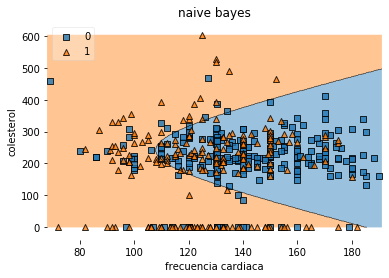

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
z = model1.predict_proba(testX)
#print(z)

# Loading some example data
#iris = datasets.load_iris()
x = np.array([train.thalach.values, train.chol.values])
X = x.transpose()
y = train.num.values
#print(X)
#print(y)
#print(train.num.values)

model22 = GaussianNB()
model22.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=model22, legend=2)

# Adding axes annotations
plt.xlabel('frecuencia cardiaca')
plt.ylabel('colesterol')
plt.title('naive bayes')
plt.show()



model21 = tree.DecisionTreeClassifier(max_depth = 4)
model21.fit(X, y)